In [30]:
import os
import requests
import json
import matplotlib.pyplot as plt
from requests.exceptions import ConnectionError

In [27]:
os.getcwd()

'/Users/vamshidharpratap/Downloads/DynamicWeb'

In [28]:
#set the working directory where Dynamic zip file is present
path = "//Users//vamshidharpratap//Downloads//DynamicWeb//"
os.chdir(path)
os.listdir()

['.DS_Store',
 'bin',
 'tests',
 'docs',
 'contacts.txt',
 'templates',
 'gothonweb',
 'manual.txt',
 '.idea']

In [76]:

def send_request(pname : str,pemail : str,url : str)-> str: 
    '''
    This function will trigger a POST request to the corresponding url 
    
    :param pname:  input string which specifies the name
    :param pemail: input string which specifies the email 
    :param url:  URL for which the request has to be triggered
    
    response : returns the response object 
    '''

    import json
    payload = json.dumps({'name':pname, 'email':pemail})
    #print(payload)
    headers = {"Content-Type": "application/json"}
    try:
        response = requests.post(url,headers = headers,json = payload)
        return response.text
    
    except (ConnectionError, ConnectionRefusedError) as exc:
        print(exc)
        print("Make sure that server is started")
 

In [91]:
try :

    with open('contacts.txt','r') as file :
        
        
        successful_attempt = 0
        unsuccessful_attempt = 0
        items_in_list = []  # stores the item number from the responses of each requests 
        url = "http://0.0.0.0:8080/form"
        graph = [] # this variable is used to plot the successful and unsuccessful attempts

        for line in file.readlines():
            #print(line)
            name, email = line.split(', ')
            if email[-2] == ',':
                email = email[:-2]
            print([name,email])    

            #'''
            respone = send_request(name,email,url)
            f = open("itemnumbers_after_request.txt", "a")
            
            
            if(respone[4:9] == 'Error'):
                #print(respone[4:9])
                unsuccessful_attempt = unsuccessful_attempt +1
                print("UnSuccessful attempt",unsuccessful_attempt,"\n")
                items_in_list.append(int(respone[123:125]))
                f.write(respone[123:125]+'\n')
                graph.append(0)

            elif(respone[4:11] == 'Success'):
                
                successful_attempt = successful_attempt+1
                print("Successful attempt:",successful_attempt)
                items_in_list.append(int(respone[130:132]))
                f.write(respone[130:132]+'\n')
                graph.append(1)
            
            else:
                print(respone)
            #'''                
                

except FileNotFoundError as exc:
    print(exc)


finally :
    
    file.close()
    f.close()
    

['Peter', 'pete@gmail.com']
UnSuccessful attempt 1 

['Korok', 'korok@yahoo.com']
Successful attempt: 1
['Stefan', 'stef@gmail.com']
UnSuccessful attempt 2 

['Lara', 'lara@yahoo.com']
Successful attempt: 2
['Jun', 'jun@gmail.com']
UnSuccessful attempt 3 

['Igor', 'igor@uni-kobelnz.com']
Successful attempt: 3
['Claudia', 'claudia@gmail.com']
UnSuccessful attempt 4 

['Ivana', 'ivana@airbnb.com']
Successful attempt: 4
['Husam', 'sam@gmail.com']
UnSuccessful attempt 5 

['Halle', 'halle@airbnb.com']
Successful attempt: 5
['Rajesh', 'raj@gmail.com\n']
Successful attempt: 6
['Dev', 'dev@gmail.com\n']
Successful attempt: 7
['Walter', 'white@gmail.com\n']
Successful attempt: 8
['Jason', 'bourne@yahoo.com\n']
Successful attempt: 9
['Bruce', 'bat@gmail.com']
Successful attempt: 10


In [92]:
items_in_list

[10, 11, 11, 12, 12, 13, 13, 14, 14, 15, 16, 17, 18, 19, 20]

In [93]:
successful_attempt

10

In [94]:
graph

[0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1]

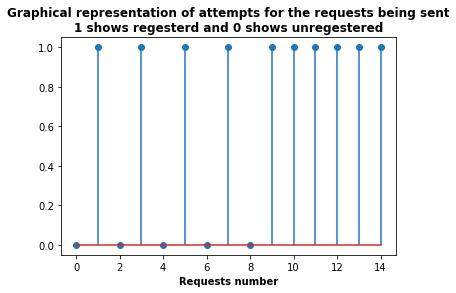

In [95]:
plt.stem(graph)
plt.title("Graphical representation of attempts for the requests being sent\n1 shows regesterd and 0 shows unregestered",weight="bold")
plt.xlabel("Requests number",weight="bold")
plt.show()

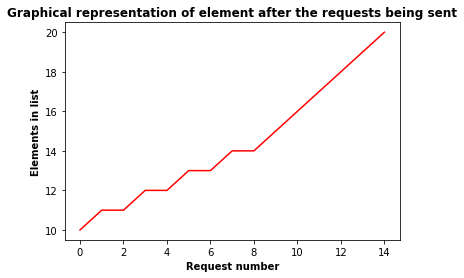

In [96]:
plt.plot(items_in_list,color='red')
plt.title("Graphical representation of element after the requests being sent",weight="bold")
plt.xlabel("Request number",weight="bold")
plt.ylabel("Elements in list",weight="bold")
plt.show()